# Fine-tuned YOLOv7 vs. COCO Pretrained YOLOv7

In [3]:
%load_ext autoreload
%autoreload 2

In [1]:
from pathlib import Path
from tools.evaluation import parse_evaluation_results
from tools.cross_eval import plot_pr, plot_ap
import matplotlib.pyplot as plt
import PIL.Image as Image

## Load Evaluation Data

In [5]:
kitti_classes = {'Car': 0, 
                 'Pedestrian': 1, 
                 'Truck': 4, 
                 'Tram': 6}

In [6]:
model_detections = {}
model_ap_scores = {}
model_precisions = {}
model_recalls = {}

### Load results of finetuned YOLOv7 

In [7]:
model_name = 'yolov7'
result_path = Path('../results/yolov7_last')

# Parse the result file
detections, ap_scores, precisions, recalls = parse_evaluation_results(result_path, kitti_classes, model_name)

['mAP_yolov7_split1.txt', 'mAP_yolov7_split2.txt', 'mAP_yolov7_split3.txt'] are found!


In [8]:
model_detections["Finetuned_" + model_name] = detections
model_ap_scores["Finetuned_" + model_name] = ap_scores
model_precisions["Finetuned_" + model_name] = precisions
model_recalls["Finetuned_" + model_name] = recalls

### Load results of pretrained YOLOv7 

In [9]:
model_name = 'yolov7'
result_path = Path('../results/yolov7_coco')

# Parse the result file
detections, ap_scores, precisions, recalls = parse_evaluation_results(result_path, kitti_classes, model_name, is_coco=True)

['mAP_yolov7_split1.txt', 'mAP_yolov7_split2.txt', 'mAP_yolov7_split3.txt'] are found!


In [10]:
model_detections["Pretrained_" + model_name] = detections
model_ap_scores["Pretrained_" + model_name] = ap_scores
model_precisions["Pretrained_" + model_name] = precisions
model_recalls["Pretrained_" + model_name] = recalls

## Detection Results on Test Dataset

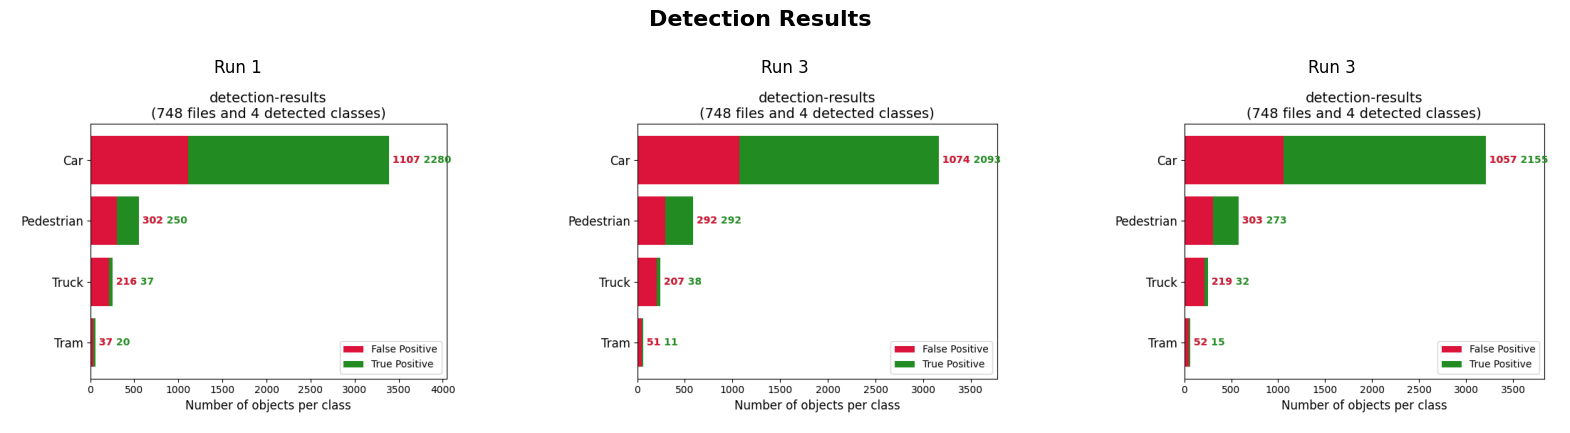

In [3]:
plt.figure(figsize=(20,5))
plt.suptitle("Detection Results", fontsize=16, fontweight='bold')
plt.subplot(1,3,1)
plt.title('Run 1')
plt.imshow(Image.open('assets/coco/split_1/detection-results-info.png'))
plt.axis('off')
plt.subplot(1,3,2)
plt.title('Run 3')
plt.imshow(Image.open('assets/coco/split_2/detection-results-info.png'))
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Run 3')
plt.imshow(Image.open('assets/coco/split_3/detection-results-info.png'))
plt.axis('off')

plt.show()

## Precision and Recall

In [11]:
%matplotlib inline

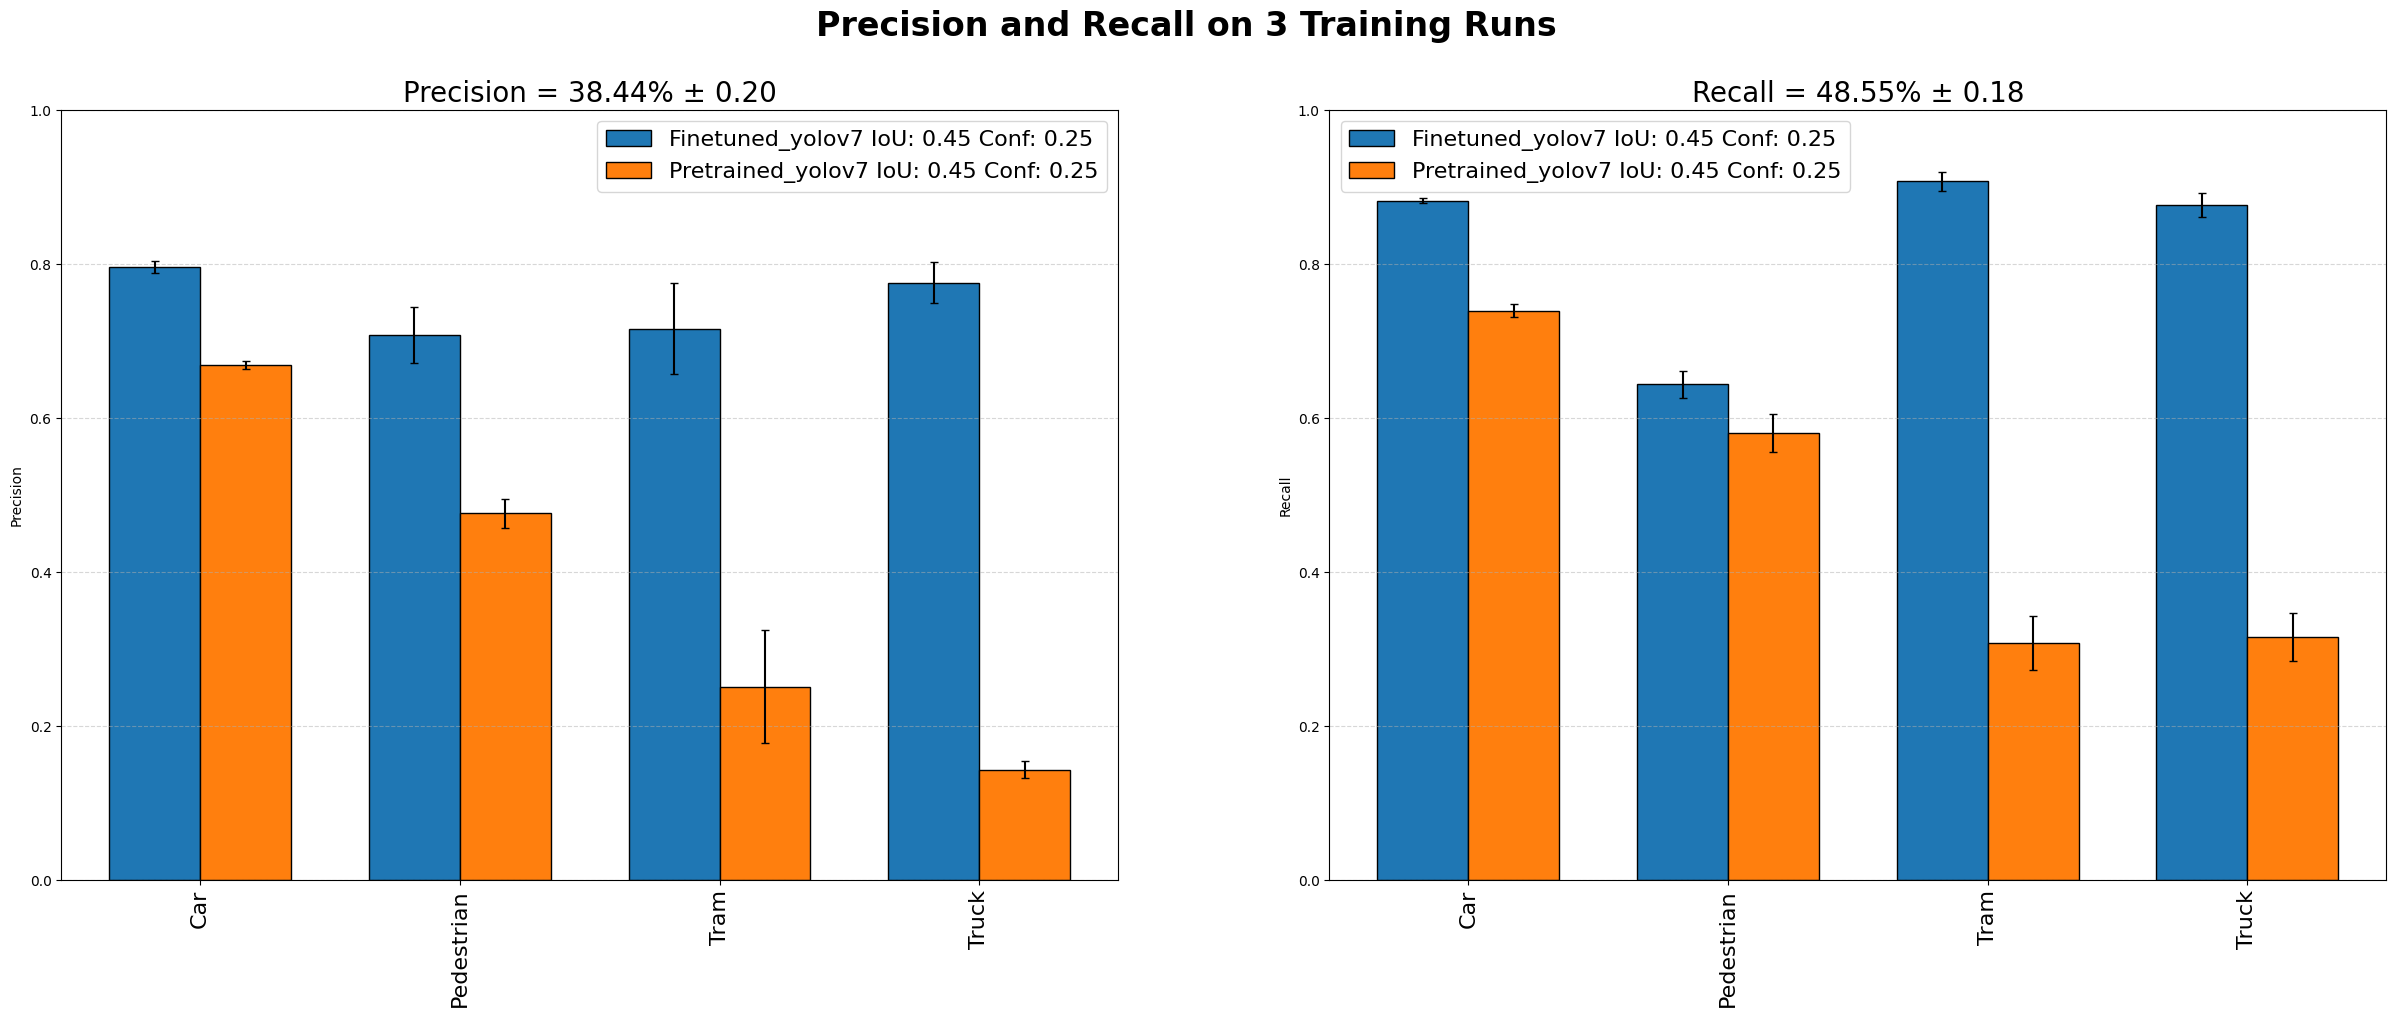

In [12]:
plot_pr(model_detections, iou_thres=[0.45, 0.45], conf_thres=[0.25, 0.25])

## Average Precision at IoU 0.5

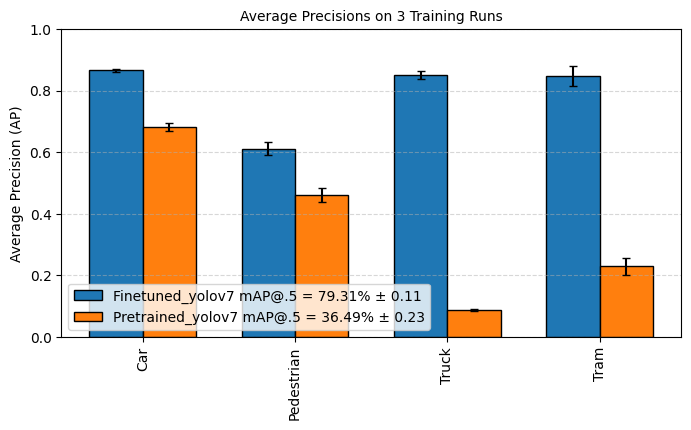

In [13]:
# Plot average precision of all the classes
plot_ap(model_ap_scores)